<a href="https://colab.research.google.com/github/Dpgofast/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Dakota__LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [196]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [197]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [198]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [199]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [204]:

# 1 = pepsi
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
 1, 0, 1, 0, 1, 1, 0, 0, 0]
df = pd.DataFrame(survey_data)
df.describe()
#df.plot.hist();

,0
count,50.000000
mean,0.660000
std,0.478518
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [205]:
import scipy 
scipy.stats.ttest_1samp(survey_data,0.5) #two tail test


Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [206]:
sample_mean = 0.660000
sample_stderr= 0.478518 / np.sqrt(len(survey_data))
# we want to calculate tstat = 2.364321853156195
#std_err/ (sample_mean - 0.5) #in the right direction wrong concept
#(df.mean() - 0.5) / (df.std() / 50**(0.5)) #adjusted for root sample size
null_hyp_mean = 0.5
t_stat= (sample_mean - null_hyp_mean) / sample_stderr
print(t_stat)

2.364322449518046


In [207]:
import random 

def make_soda_data(n=50):
  return pd.DataFrame([random.randint(0,1size)for _ in range(n)])

SyntaxError: ignored

In [208]:
#fair version
t_statistics = []
n_exp = 10000

for _ in range(n_exp):
  df = make_soda_data()
  ttest = scipy.stats.ttest_1samp(df, 0.5)
  t_statistics.append(ttest.statistic)
pd.DataFrame(t_statistics).describe()

,0
count,10000.000000
mean,1.468066
std,1.067963
min,-2.041667
25%,0.846114
50%,1.428869
75%,2.041667
max,6.491982


In [209]:
import random 

def make_soda_data(n=50):
  return pd.DataFrame([np.random.binomial(n=1, p=0.6) for _ in range(n)])
pd.DataFrame(t_statistics).describe()

,0
count,10000.000000
mean,1.468066
std,1.067963
min,-2.041667
25%,0.846114
50%,1.428869
75%,2.041667
max,6.491982


## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

   1. Class Name: 2 (democrat, republican)
    2. handicapped-infants: 2 (y,n)
    3. water-project-cost-sharing: 2 (y,n)
    4. adoption-of-the-budget-resolution: 2 (y,n)
    5. physician-fee-freeze: 2 (y,n)
    6. el-salvador-aid: 2 (y,n)
    7. religious-groups-in-schools: 2 (y,n)
    8. anti-satellite-test-ban: 2 (y,n)
     9. aid-to-nicaraguan-contras: 2 (y,n)
    10. mx-missile: 2 (y,n)
    11. immigration: 2 (y,n)
    12. synfuels-corporation-cutback: 2 (y,n)
    13. education-spending: 2 (y,n)
    14. superfund-right-to-sue: 2 (y,n)
    15. crime: 2 (y,n)
    16. duty-free-exports: 2 (y,n)
    17. export-administration-act-south-africa: 2 (y,n)

In [0]:
import pandas as pd 
import scipy as sp 
import numpy as np

In [211]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',header=None)
df.head()
#df.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [212]:
dfy= df.replace('?',value= 'y' )
df.replace('y',value= 1, inplace=True) #change all yea votes to 1 
df.replace('n',value= 0, inplace=True) #change all nay votes to 0
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,0,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [213]:
dfy.head()
dfy.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,243,264,247,227,283,253,257,229,223,264,233,234,265,233,373


In [0]:
dfn= df.replace('?', value= 0)

In [215]:
dfn.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.448276,0.581609,0.406897,0.487356,0.625287,0.549425,0.556322,0.475862,0.496552,0.344828,0.393103,0.480460,0.570115,0.400000,0.618391
std,0.495630,0.497890,0.493863,0.491821,0.500416,0.484606,0.498124,0.497390,0.499992,0.500564,0.475859,0.489002,0.500193,0.495630,0.490462,0.486341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [216]:
dfn.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [217]:
demdfn= dfn.loc[df[0]=='democrat'] #where no vote cast = no 
demdfn.shape
demdfn.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,0.584270,0.449438,0.865169,0.052434,0.205993,0.460674,0.749064,0.816479,0.704120,0.464419,0.483146,0.134831,0.273408,0.337079,0.599251,0.647940
std,0.493773,0.498371,0.342185,0.223320,0.405185,0.499387,0.434366,0.387820,0.457295,0.499669,0.500654,0.342185,0.446546,0.473600,0.490971,0.478509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [218]:
repdfn= dfn.loc[df[0]== 'republican']# where no vote cast = no
repdfn.shape
repdfn.describe()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.184524,0.446429,0.130952,0.970238,0.934524,0.886905,0.232143,0.142857,0.113095,0.547619,0.125000,0.803571,0.809524,0.940476,0.083333,0.571429
std,0.389070,0.498608,0.338357,0.170438,0.248104,0.317656,0.423462,0.350973,0.317656,0.499215,0.331708,0.398484,0.393851,0.237310,0.277212,0.496351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
rep_means= [0.202381,0.565476,0.154762,0.988095,0.952381,0.898810,0.267857,
            0.208333,0.130952,0.565476,0.178571,0.880952,0.869048,0.982143,
            0.154762,0.702381]
dem_means= [0.617978,0.554307,0.891386,0.082397,0.250936,0.494382,0.779026,
            0.831461,0.775281,0.479401,0.528090,0.202247,0.329588,0.374532,
            0.659176,0.955056]

In [220]:
sp.stats.ttest_ind(rep_means,dem_means) #overall means of the entire dataset

Ttest_indResult(statistic=-0.059137886302266914, pvalue=0.9532344657694571)

In [222]:
#  4. adoption-of-the-budget-resolution: 2 (y,n) 1=y, 0=n
budget_res= sp.stats.ttest_ind(repdfn[4],demdfn[4])
#not sure if the above proves anything
budget_res


Ttest_indResult(statistic=45.563274565649124, pvalue=2.7018479980417798e-167)

In [233]:
anti_ban = sp.stats.ttest_ind(repdfn[8],demdfn[8])
anti_ban

Ttest_indResult(statistic=-18.28795984953887, pvalue=8.889372685886026e-56)

budget resolution= Ttest_indResult(statistic=45.563274565649124, pvalue=2.7018479980417798e-167)


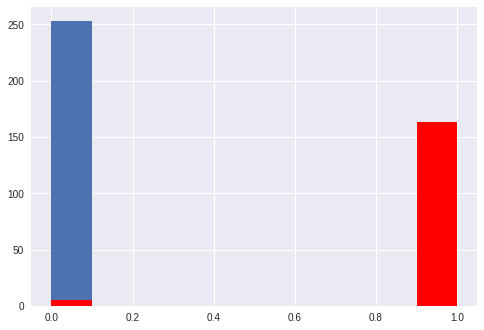

In [257]:
demdfn[4].hist();
repdfn[4].hist(color='r');
budget_res
print("budget resolution=",budget_res)

anti-satellite-test-ban Ttest_indResult(statistic=-18.28795984953887, pvalue=8.889372685886026e-56)


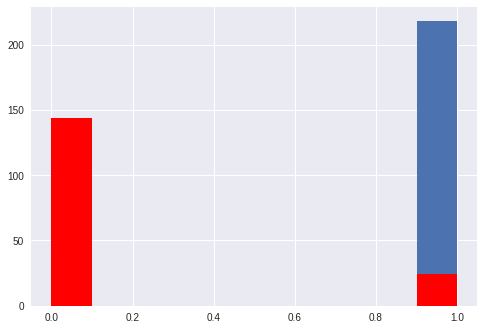

In [258]:
demdfn[8].hist();
repdfn[8].hist(color='r');
print('anti-satellite-test-ban shows democrat majority',anti_ban)

aid-to-nicaraguan-contras: Ttest_indResult(statistic=-14.669525836064388, pvalue=7.695699823102095e-40)


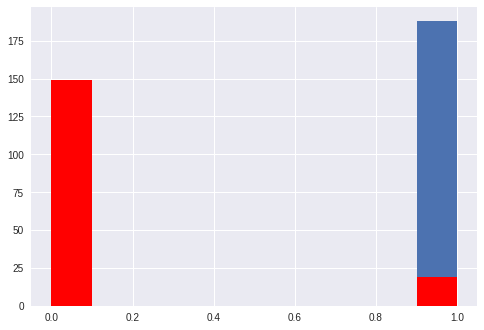

In [279]:
demdfn[9].hist()
repdfn[9].hist(color='r');
nic = sp.stats.ttest_ind(repdfn[9],demdfn[9])
print('aid-to-nicaraguan-contras:',nic)

In [275]:
nic = sp.stats.ttest_ind(repdfn[9],demdfn[9])

Ttest_indResult(statistic=-14.669525836064388, pvalue=7.695699823102095e-40)